In [22]:
pip install pandas openpyxl xlrd seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import sys
sys.path.append('../')  # Add the parent directory to the sys.path

from scripts.data_preparation import load_data, clean_data, prepare_data
from scripts.eda import plot_churn_distribution, plot_pairplot, plot_boxplot, plot_scatter
from scripts.modeling import split_data, train_random_forest, train_gradient_boosting

In [24]:
# Imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scripts.data_preparation import load_data, clean_data, prepare_data
from scripts.eda import plot_churn_distribution, plot_pairplot, plot_boxplot, plot_scatter
from scripts.modeling import split_data, train_random_forest, train_gradient_boosting
from scripts.visualization import plot_confusion_matrix


In [25]:
import pandas as pd

def load_data(filepath):
    try:
        data = pd.read_excel(filepath, engine='openpyxl')  # Ensure you're specifying the engine
        print("File read successfully as an Excel file.")
        return data
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        return None


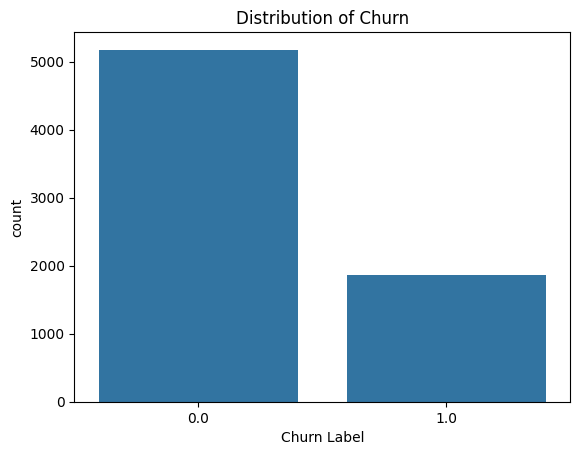

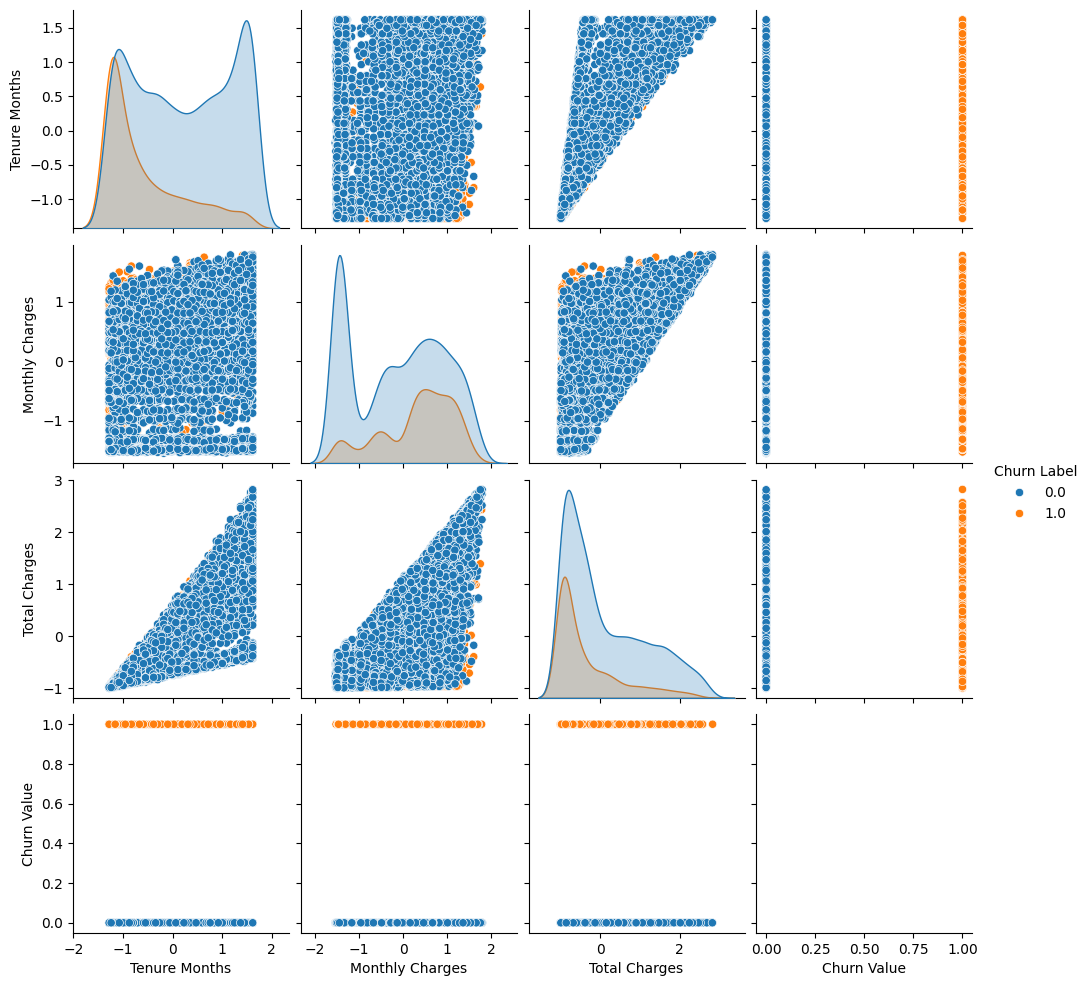

Random Forest Model
Accuracy: 0.9311568488289567
[[976  33]
 [ 64 336]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1009
         1.0       0.91      0.84      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   5.7s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   5.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimato

In [26]:

# read excel dataset as csv because system does not allow in any other way 
csv_file_path = '../Data/Telco_customer_churn.xlsx'

# Check if data was loaded successfully
if data is None:
    print("Data was not loaded successfully. Exiting.")
else:
    # Clean data
    data = clean_data(data)

    # Prepare data
    data = prepare_data(data)

    # Exploratory Data Analysis
    plot_churn_distribution(data)
    plot_pairplot(data, ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value'])

    # Split data for modeling
    X_train, X_test, y_train, y_test = split_data(data)

    # Train Random Forest Model
    train_random_forest(X_train, y_train, X_test, y_test)

    # Train Gradient Boosting Model with hyperparameter tuning
    train_gradient_boosting(X_train, y_train, X_test, y_test)